# Project: No-show appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This project explores <a href="https://www.kaggle.com/joniarroba/noshowappointments">No-show appointments dataset</a> on brazilian patients. The dataset includes variables about diabetes, alcoholism, handicap, hypertension, neighbourhood, age, and gender of patients. It includes the scdueled day for the appointment and the actual appointment day, whether or not the patient is enrolled in the <em>Bolsa Familia</em> program (Scholarship column), and wether or not the patient received an SMS (SMSReceived column). The last column represents wether or not the patient showed up for the appointment.

><b>NOTE:</b> in NoShow column 'NO' = 'The patient went to the appointment' and 'YES' = 'The patient didn't go to the appointment' which can be counterintutive and so must be emphasized from the beggining.

>The goal from the analysis preformed in this project is to identify factors that affect whether the patients show up to their appointment or not and therefore be able to predict if a future patient will show up for their appointment.



In [1]:
#import all required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
#import matplotlib inline to draw visualizations inline with the notebook.
%matplotlib inline

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


<a id='wrangling'></a>
## Data Wrangling

> In this section, the data will be loaded, explored and cleaned for analysis and visualization in the analysis section.

### General Properties

In [2]:
#import no-show dataset
no_show_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

>In the next few cells, we will explore the data and find the issues that need cleaning.

In [3]:
#exploring dataset variables using head() 
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#print the shape of the dataset (rows,columns)
no_show_df.shape

(110527, 14)

In [5]:
#print information about each column in the dataset
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#print the unique values of each variable.
print(f"Unique Values in `Gender` ==> {no_show_df.Gender.unique()}")
print(f"Unique Values in `Scholarship` ==> {no_show_df.Scholarship.unique()}")
print(f"Unique Values in `Hypertension` ==> {no_show_df.Hipertension.unique()}")
print(f"Unique Values in `Diabetes` ==> {no_show_df.Diabetes.unique()}")
print(f"Unique Values in `Alcoholism` ==> {no_show_df.Alcoholism.unique()}")
print(f"Unique Values in `Handicap` ==> {no_show_df.Handcap.unique()}")
print(f"Unique Values in `SMSReceived` ==> {no_show_df.SMS_received.unique()}")
print(f"Unique Values in `Age` ==> {no_show_df.Age.unique()}")
print(f"Unique Values in `Neighbourhood` ==> {no_show_df.Neighbourhood.unique()}")

Unique Values in `Gender` ==> ['F' 'M']
Unique Values in `Scholarship` ==> [0 1]
Unique Values in `Hypertension` ==> [1 0]
Unique Values in `Diabetes` ==> [0 1]
Unique Values in `Alcoholism` ==> [0 1]
Unique Values in `Handicap` ==> [0 1 2 3 4]
Unique Values in `SMSReceived` ==> [0 1]
Unique Values in `Age` ==> [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Unique Values in `Neighbourhood` ==> ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE 

>From the previous cells we can deduce a few problems in the columns: 
>- some columns are misspelled [ Hipertension, Handcap]
>- some columns are not in consistent naming with the rest of the columns [SMS_received, No-show]
>- PatientId should be int.
>- ScheduledDay and AppointmentDay should be datetime.
>- It is not logical to have age values below 0,therefore, they must be removed. 


### Data Cleaning 
>Issues:
>- Fix misspelled columns [Hipertension, Handcap]
>- Rename columns [SMS_received, No-show] to make naming consistent
>- Change PatiendId from float to int.
>- Change ScheduledDay and AppointmentDay data tpye to datetime.
>- Delete all values below 0 in Age column.

In [7]:
#make a copy of the original dataset to apply the changes on.
no_show_df_clean = no_show_df.copy()

- Fix misspelled columns [Hipertension, Handcap] and rename columns [SMS_received, No-show].

In [8]:
no_show_df_clean.rename(columns = {'Hipertension':'Hypertension',
                                   'Handcap':'Handicap',
                                   'SMS_received':'SMSReceived',
                                   'No-show':'NoShow'}, inplace = True)

- Change PatiendId from float to int.

In [9]:
no_show_df_clean['PatientId'] = no_show_df_clean['PatientId'].astype('int64').abs()

- Change ScheduledDay and AppointmentDay data type to datetime.

In [10]:
no_show_df_clean['ScheduledDay'] = pd.to_datetime(no_show_df_clean['ScheduledDay']).dt.date.astype('datetime64[ns]')
no_show_df_clean['AppointmentDay'] = pd.to_datetime(no_show_df_clean['AppointmentDay']).dt.date.astype('datetime64[ns]')

- Delete all values below 0 in Age column.

In [11]:
no_show_df_clean = no_show_df_clean[no_show_df_clean['Age'] >= 0]

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we will analyze and visualize the data to try to find the answer to the main question stated below.

### What factors affect whether a patient show ups for his/her appointment or not?
> We will start by analyzing some variables on the show/noshow of a patient.

In [12]:
#function to draw Show/NoShow countplot for any feature
def show_no_show_graph(column_name):
    ax = sns.countplot(x=no_show_df_clean[column_name], hue=no_show_df_clean.NoShow, data=no_show_df_clean)
    ax.set_title(f"Show/NoShow for {column_name}")
    x_ticks_labels=['No', 'Yes']
    ax.set_xticklabels(x_ticks_labels)
    plt.plot()

In [13]:
#function to draw percentage graph for any feature
def percentage_graph(column_name):
    went_ratio = no_show_df_clean[no_show_df_clean.NoShow == 'No'].groupby([column_name]).size()/no_show_df_clean.groupby([column_name]).size()
    ax = sns.barplot(x=went_ratio.index, y=went_ratio, palette="rocket");
    ax.set_title(f"Show up Percentage for {column_name}")
    x_ticks_labels=['No', 'Yes']
    ax.set_xticklabels(x_ticks_labels)
    plt.show()

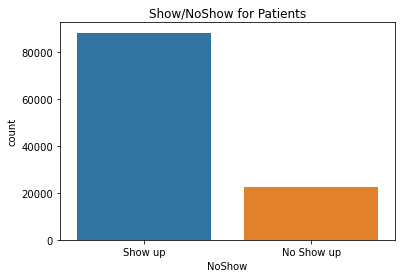

In [14]:
ax = sns.countplot(x=no_show_df_clean.NoShow, data=no_show_df_clean)
ax.set_title("Show/NoShow for Patients")
x_ticks_labels=['Show up', 'No Show up']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [15]:
no_show_df_clean.SMSReceived.value_counts()

0    75044
1    35482
Name: SMSReceived, dtype: int64

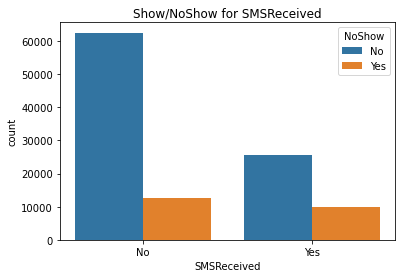

In [16]:
show_no_show_graph('SMSReceived')

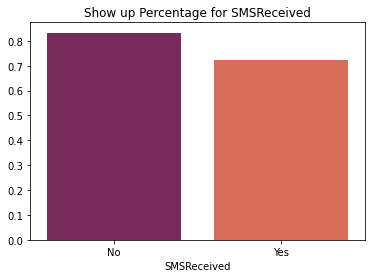

In [17]:
percentage_graph('SMSReceived')

>From the previous visualizations we can see that the percentage of patients who received SMS and went to their appointment(around 70%) is less than the number of patients who didn't receive and went to the appointment(around 80%). This is counterintutive as normaly patients who have received SMS go to their appointments more that patients who didn't. As the results are counterintutive and it's not specified in the dataset description the contents of the SMS, the SMSReceived feature won't be considered as a feature which affects patients Show/NoShow to appointments.

In [18]:
no_show_df_clean.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

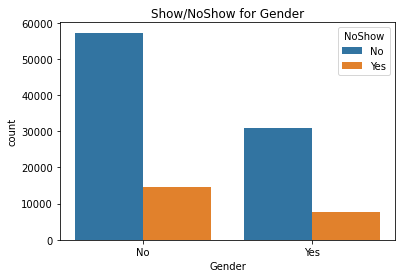

In [19]:
show_no_show_graph('Gender')

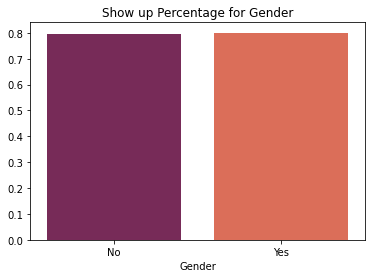

In [20]:
percentage_graph('Gender')

>From the previous visualizations, we can see that females and males are equally likely to go to their appointment. Therefore, Gender feature of the patient doesn't affect their Show/NoShow to appointments

In [21]:
no_show_df_clean.Diabetes.value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

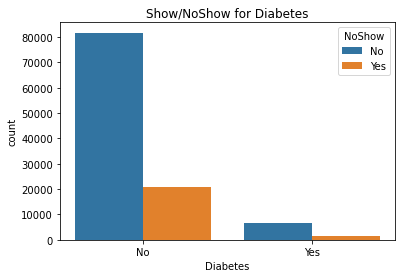

In [22]:
show_no_show_graph('Diabetes')

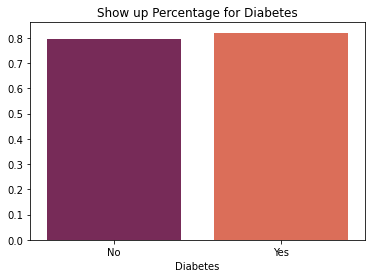

In [23]:
percentage_graph('Diabetes')

>From the previous visualization, we can see that more than 80% of diabetic patients attend their appointments while less than 80% of non-diabetic patients attend their appointments. Therefore we can conclude that the Diabetes feature may help us predict the patients Show/NoShow for their appointments.

In [24]:
no_show_df_clean.Hypertension.value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

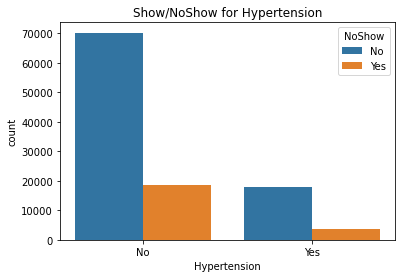

In [25]:
show_no_show_graph('Hypertension')

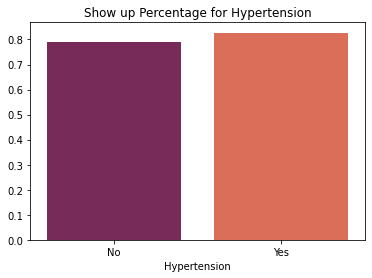

In [26]:
percentage_graph('Hypertension')

>From the previous visualization, we can see that more than 80% of patients with hypertension attend their appointments while less than 80% of patients with no hypertension attend their appointments. Therefore we can conclude that the Hypertension feature may help us predict the patients Show/NoShow for their appointments.

In [27]:
no_show_df_clean.Alcoholism.value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

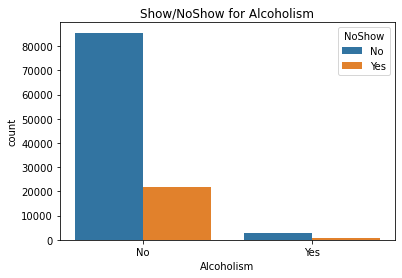

In [28]:
show_no_show_graph('Alcoholism')

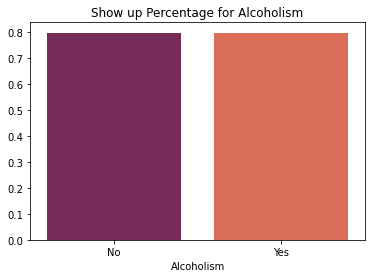

In [29]:
percentage_graph('Alcoholism')

>From the previous visualization we can see that the percentage of alcoholic and non-alcoholic patients who attend their appointments is almost equal. Therefore, the Alcoholism feature won't help us predict the patients Show/NoShow for their appointments.

In [30]:
no_show_df_clean.Handicap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

[]

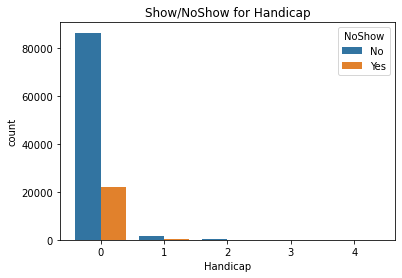

In [31]:
ax = sns.countplot(x=no_show_df_clean.Handicap, hue=no_show_df_clean.NoShow, data=no_show_df_clean)
ax.set_title("Show/NoShow for Handicap")
plt.plot()

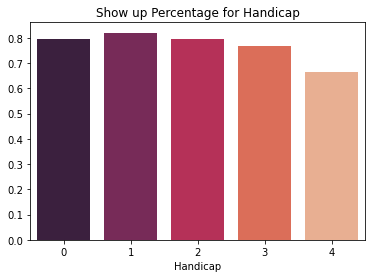

In [32]:
handicap_went_ratio = no_show_df_clean[no_show_df_clean.NoShow == 'No'].groupby(['Handicap']).size()/no_show_df_clean.groupby(['Handicap']).size()
ax = sns.barplot(x=handicap_went_ratio.index, y=handicap_went_ratio, palette="rocket");
ax.set_title("Show up Percentage for Handicap")
plt.show()

>From the previous visualization, we can see the number of patients without handicap who attend their appointments (around 80% of 10,000 patients) is much higher than patients with handicap who attend their appointments although their percentages are close. Therefore , we can conclude that the Handicap feature may help us predict the patients Show/NoShow for their appointments.

In [33]:
no_show_df_clean.Scholarship.value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

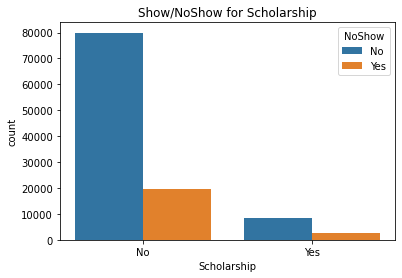

In [34]:
show_no_show_graph('Scholarship')

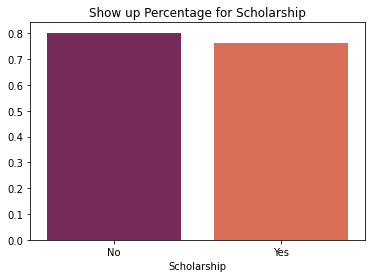

In [35]:
percentage_graph('Scholarship')

>From the previous visualization, we can see that the percentage of patients who went to their apppointment who didn't have a scholarship (around 80%) is higher than the percentage of patients who went to their apppointment who had a scholarship. Therefore, we can conclude that the Scholarship feature may help us predict the patients Show/NoShow to their appointments.

In [36]:
#percentage of patients that showed up to appointment by age
age_show_up = no_show_df_clean[no_show_df_clean.NoShow == 'No'].groupby(['Age']).size()/no_show_df_clean.groupby(['Age']).size()
#percentage of patients that didn't show up to appointment by age
age_no_show_up = no_show_df_clean[no_show_df_clean.NoShow == 'Yes'].groupby(['Age']).size()/no_show_df_clean.groupby(['Age']).size()

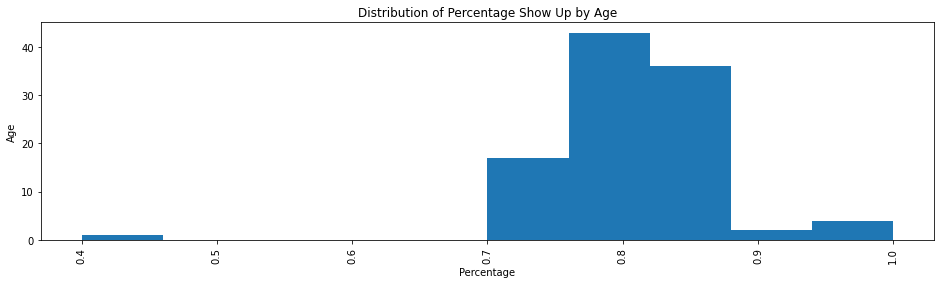

In [37]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = plt.hist(age_show_up)
plt.xlabel('Percentage')
plt.ylabel('Age')
plt.title("Distribution of Percentage Show Up by Age")
plt.show()

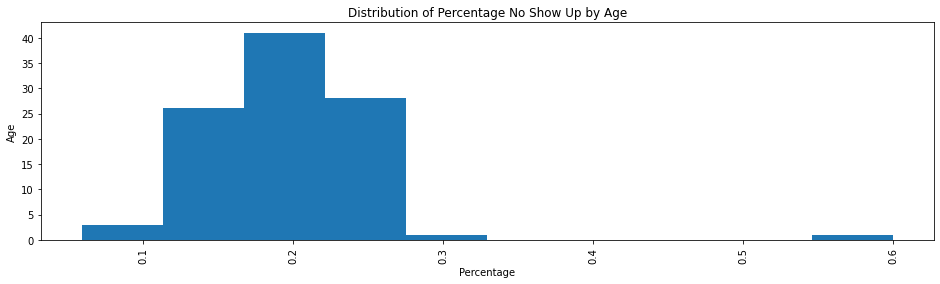

In [38]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = plt.hist(age_no_show_up)
plt.xlabel('Percentage')
plt.ylabel('Age')
plt.title("Distribution of Percentage No Show Up by Age")
plt.show()

>From the previous visualizations we can clearly see that the age of patients affects whether they show up to their appointments or not. Therefore, Age feature may help us predict the patients Show/NoShow to their appointments.

In [39]:
#create a cloumn containing the number of waiting days for each patient between the schdueled day and the appointment day.
no_show_df_clean['AppointmentDay'] = np.where((no_show_df_clean['AppointmentDay'] - no_show_df_clean['ScheduledDay']).dt.days < 0, no_show_df_clean['ScheduledDay'], no_show_df_clean['AppointmentDay'])
no_show_df_clean['Waiting_Time_days'] = no_show_df_clean['AppointmentDay'] - no_show_df_clean['ScheduledDay']
no_show_df_clean['Waiting_Time_days'] = no_show_df_clean['Waiting_Time_days'].dt.days


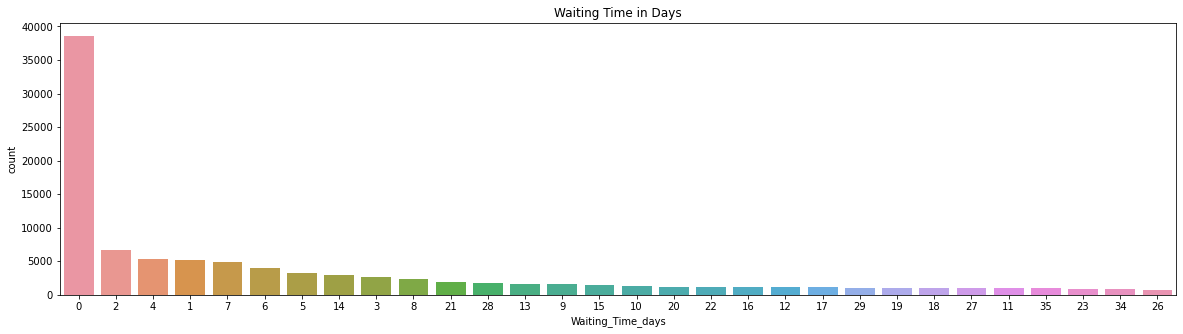

In [40]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=no_show_df_clean.Waiting_Time_days, order=no_show_df_clean.Waiting_Time_days.value_counts().iloc[:30].index)
ax.set_title("Waiting Time in Days")
plt.show()

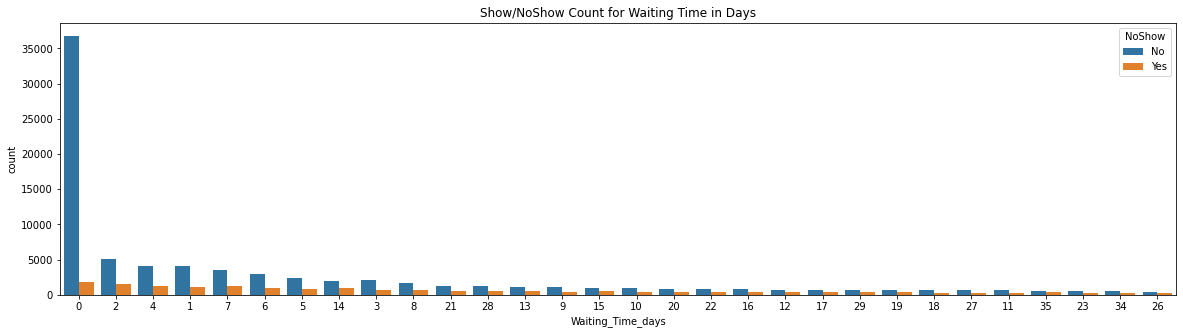

In [41]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=no_show_df_clean.Waiting_Time_days, hue=no_show_df_clean.NoShow, order=no_show_df_clean.Waiting_Time_days.value_counts().iloc[:30].index)
ax.set_title("Show/NoShow Count for Waiting Time in Days")
plt.show()

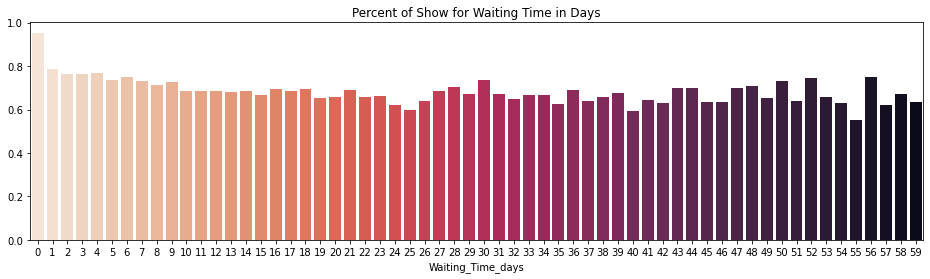

In [42]:
no_show_df_clean_w_ratio = no_show_df_clean[no_show_df_clean.NoShow == 'No'].groupby(['Waiting_Time_days']).size()/no_show_df_clean.groupby(['Waiting_Time_days']).size()

plt.figure(figsize=(16,4))
ax = sns.barplot(x=no_show_df_clean_w_ratio.index, y=no_show_df_clean_w_ratio, order=no_show_df_clean.Waiting_Time_days.iloc[:60].index, palette="rocket_r")
ax.set_title("Percent of Show for Waiting Time in Days")
plt.show()

>From the previous visualizations, we can see that as the number of days exceeds 7 days the number of patients that go to their appointments decreases significally. Therefore we can use the number of waiting days to predict the patients Show/NoShow to their appointments.

<a id='conclusions'></a>
## Conclusions

>From the previous analysis we can sum up some features which may help us in predicting whether the patient will show up to his/her appointment: 
>- Age
>- Number of waiting days
>- Diabetes 
>- Hypertension
>- Scholarship
>- Handicap

>**Limitations:**
>The conclusion drawn here are based solely on the analysis techniques applied to the variables in this project. There can be another analysis techniques applied that can possibly modify or refute some of the observations made here, for example: analyzing more that one feature in relation to each other, and analyzing the neighbourhood feature.
>Additionally, a clear description of SMSReceived feature and it's relation to the appointments of patients could help us perform better exploration of the feature and decide it's importance in the prediction of Show/NoShow of patients to their appointments.